#Description:
**Across several social media sites, the Social Media Sentiments Analysis Dataset vividly depicts a tapestry of emotions, trends, and interactions. This dataset gives a sample of user-generated material, including text, hashtags, timestamps, nations, likes, and retweets, is given by this dataset. Every submission shares one-of-a-kind tales from people all around the world, including moments of surprise, excitement, admiration, thrill, contentment, and more.**

**Importing necessary libraries**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install colorama
from colorama import Fore, init
import plotly.express as px
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Dataset**
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/social-media_sentimentdataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


**Checking for Null values**
---

In [ ]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


In [ ]:
df.duplicated().sum()

0

**Exploration of data**
---

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [ ]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour'])
# check 'Sentiment'
df['Sentiment'].value_counts()

 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: Sentiment, Length: 279, dtype: int64

In [ ]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,1
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,1
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,1
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,1
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,1


In [ ]:
# check 'Platform'
df['Platform'].value_counts()

 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: Platform, dtype: int64

In [ ]:
# check 'Country'
df['Country'].value_counts()

 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: Country, Length: 115, dtype: int64

In [ ]:
df['Platform'] = df['Platform'].str.strip()
df['Country'] = df['Country'].str.strip()

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

month_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

df['Month'] = df['Month'].map(month_mapping)
df['Month'] = df['Month'].astype('object')


In [ ]:
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')

Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Sweden: 2
Colombia: 1
Scotland: 1
Kenya: 1
Jamaica: 1
Ireland: 1
China: 1
Norway: 1
Cambodia: 1
Maldives: 1
Peru: 1
Jordan: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2012: 4
2013: 4
2014: 4
2010: 3


Total unique values for Month: 12
Februari: 85
Januari: 82
Agustus: 78
September: 77
Juni: 71
Juli: 62
April: 51
November: 49
Oktober: 48
Mei: 46
Maret: 44
Desember: 39


Total unique values for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




In [ ]:
df1 = df.copy()

**Cleaning of text**
---

In [ ]:
#Clean text
stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)

    return text

df1["Clean_Text"] = df1["Text"].apply(clean)

**Visualisation**
---

In [ ]:
#Sentiment analysis
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Vader_Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Vader_Sentiment']].head())

                               Clean_Text  Vader_Score Vader_Sentiment
0     enjoy beauti day park                     0.4939        positive
1   traffic terribl morn                        0.0000         neutral
2    finish amaz workout 💪                      0.0000         neutral
3     excit upcom weekend getaway               0.0000         neutral
4    tri new recip dinner tonight               0.0000         neutral


In [ ]:
df1 = df1.drop(columns=['Text','Sentiment'])

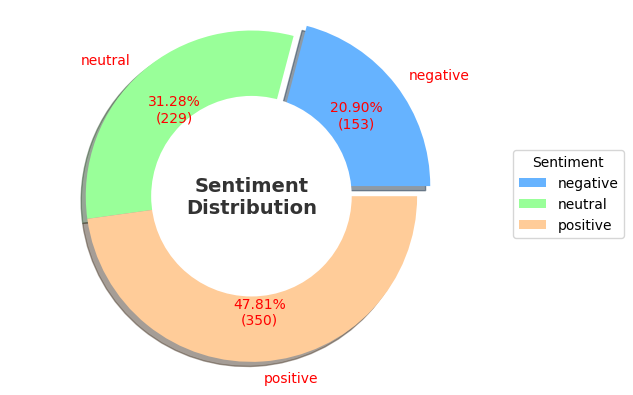

In [ ]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)

sentiment_counts = df1.groupby("Vader_Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

In [ ]:
df1.head(2)

,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week,Clean_Text,Vader_Score,Vader_Sentiment
0,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,Januari,Sunday,enjoy beauti day park,0.4939,positive
1,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,Januari,Sunday,traffic terribl morn,0.0000,neutral


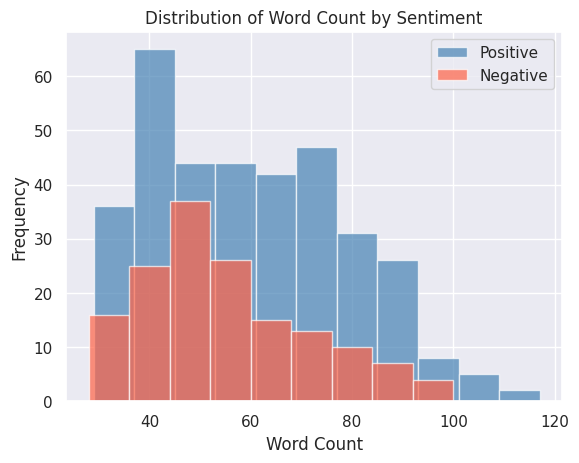

In [ ]:
df1["word_count"] = df1['Clean_Text'].apply(len)
sns.set(style="darkgrid", palette="muted", color_codes=True)

positive_reviews = df1[df1["Vader_Sentiment"] == 'positive']
negative_reviews = df1[df1["Vader_Sentiment"] == 'negative']

sns.distplot(positive_reviews['word_count'], color='steelblue', label='Positive', kde=False, hist_kws={'alpha': 0.7})
sns.distplot(negative_reviews['word_count'], color='tomato', label='Negative', kde=False, hist_kws={'alpha': 0.7})

plt.title('Distribution of Word Count by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

plt.show()

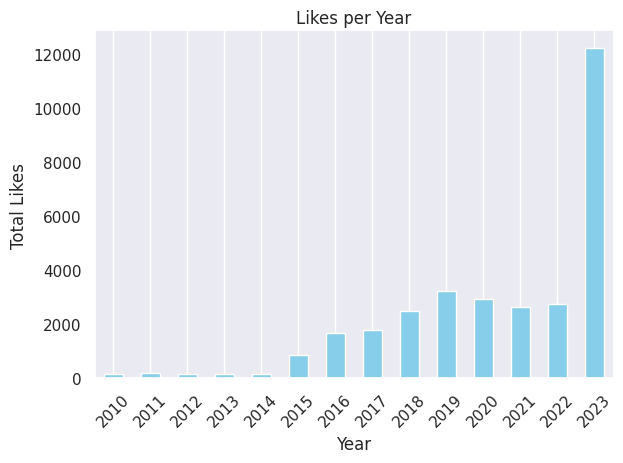

In [ ]:
likes_per_year = df.groupby('Year')['Likes'].sum()

likes_per_year.plot(kind='bar', color='skyblue')
plt.title('Likes per Year')
plt.xlabel('Year')
plt.ylabel('Total Likes')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

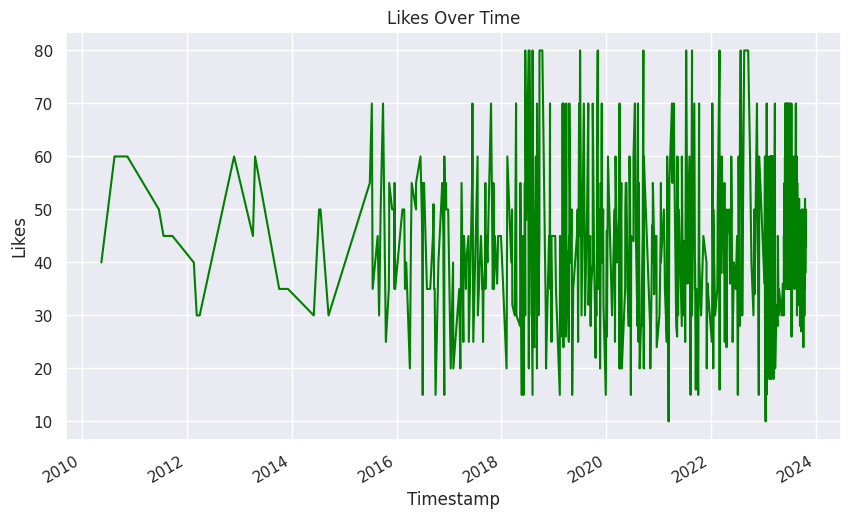

In [ ]:
# Line plot of likes over time
plt.figure(figsize=(10, 6))
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert 'Timestamp' column to datetime
df.set_index('Timestamp')['Likes'].plot(color='green')
plt.title('Likes Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Likes')
plt.grid(True)
plt.show()

In [ ]:
df1.head()

,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week,Clean_Text,Vader_Score,Vader_Sentiment,word_count
0,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,Januari,Sunday,enjoy beauti day park,0.4939,positive,36
1,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,Januari,Sunday,traffic terribl morn,0.0000,neutral,38
2,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,Januari,Sunday,finish amaz workout 💪,0.0000,neutral,37
3,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,Januari,Sunday,excit upcom weekend getaway,0.0000,neutral,36
4,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,Januari,Sunday,tri new recip dinner tonight,0.0000,neutral,37


In [ ]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,Januari,Sunday
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,Januari,Sunday
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,Januari,Sunday
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,Januari,Sunday
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,Januari,Sunday


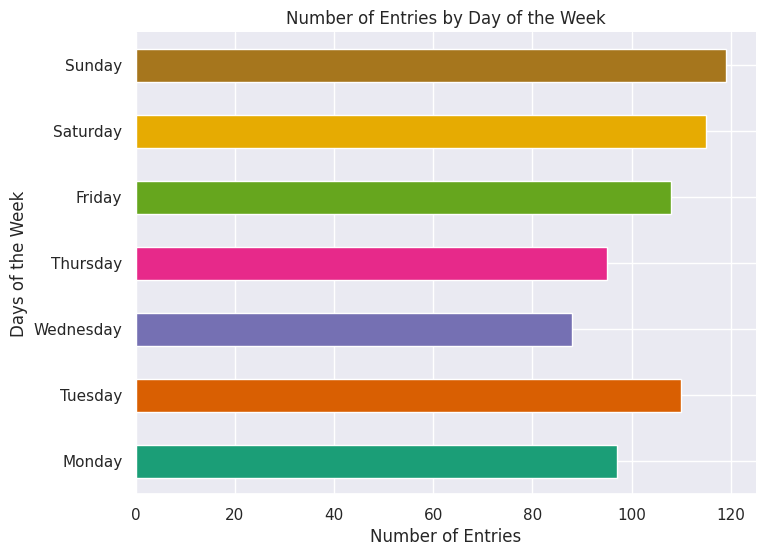

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the day of the week from the 'Timestamp' column and create a new column 'Day_of_Week'
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the number of entries for each day of the week with the specified day order
plt.figure(figsize=(8, 6))
df.groupby('Day_of_Week').size().loc[day_order].plot(kind='barh', color=sns.color_palette('Dark2'))
plt.xlabel('Number of Entries')
plt.ylabel('Days of the Week')
plt.title('Number of Entries by Day of the Week')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

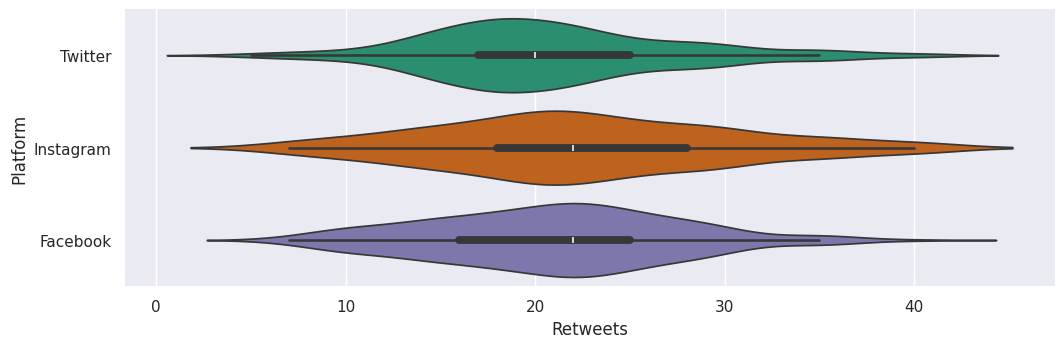

In [ ]:
# Platform vs Retweets

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate figure size based on the number of unique platforms
figsize = (12, 1.2 * len(df['Platform'].unique()))

# Create the plot
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='Retweets', y='Platform', inner='box', palette='Dark2')

# Remove unnecessary spines
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.show()


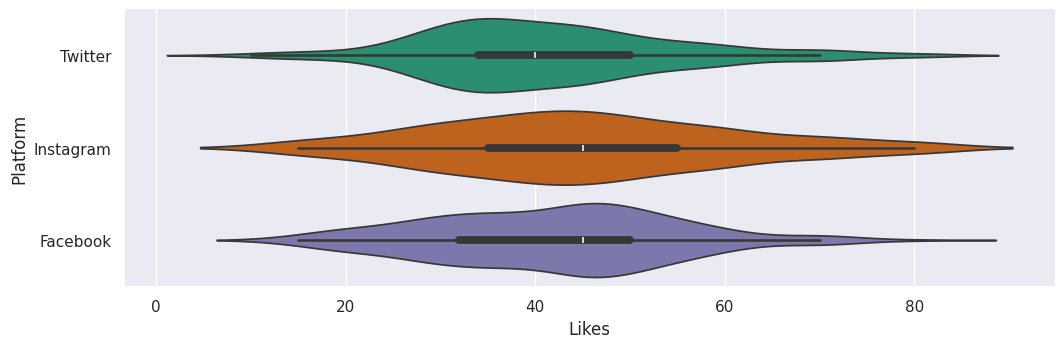

In [ ]:
# Platform vs Likes

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate figure size based on the number of unique platforms
figsize = (12, 1.2 * len(df['Platform'].unique()))

# Create the plot
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='Likes', y='Platform', inner='box', palette='Dark2')

# Remove unnecessary spines
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.show()


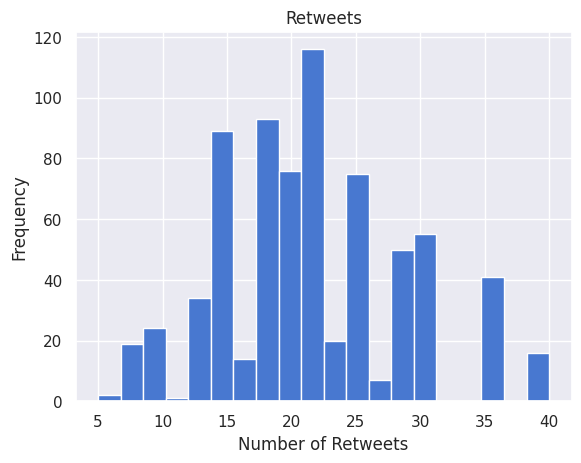

In [ ]:
from matplotlib import pyplot as plt

# Plot histogram
df['Retweets'].plot(kind='hist', bins=20, title='Retweets')

# Set xlabel and ylabel
plt.xlabel('Number of Retweets')
plt.ylabel('Frequency')

# Hide top and right spines
plt.gca().spines[['top', 'right']].set_visible(True)

# Show plot
plt.show()


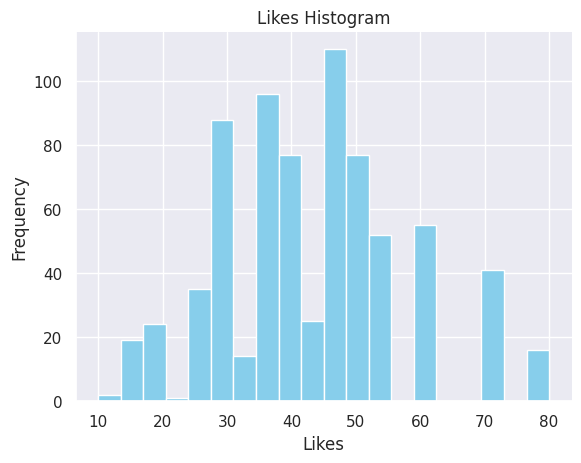

In [ ]:
# Likes Histogram

import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['Likes'], bins=20, color='skyblue')
plt.title('Likes Histogram')
plt.xlabel('Likes')
plt.ylabel('Frequency')

# Remove unnecessary spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()


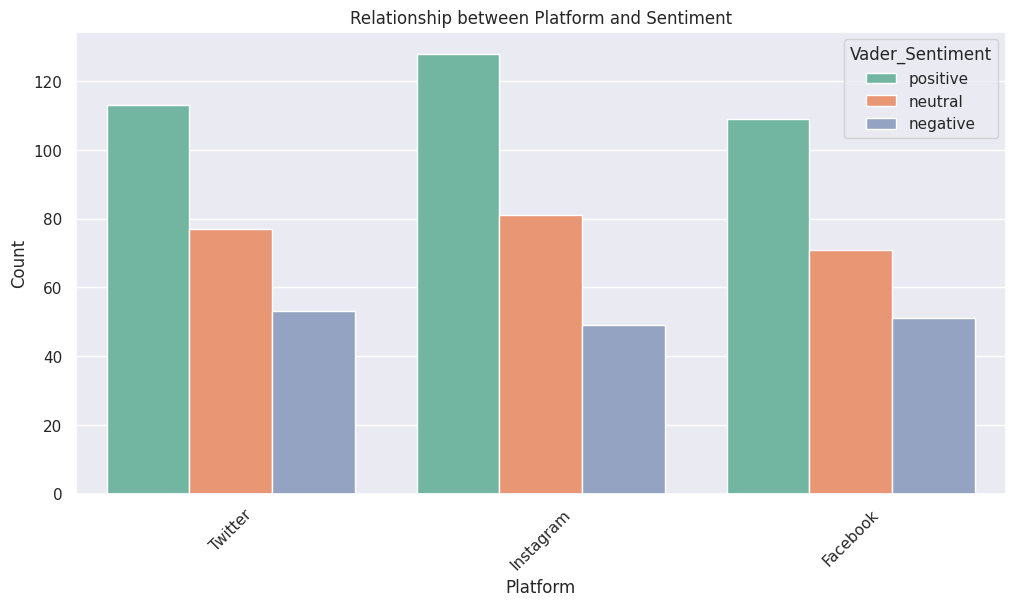

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Vader_Sentiment', data=df1, palette='Set2')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

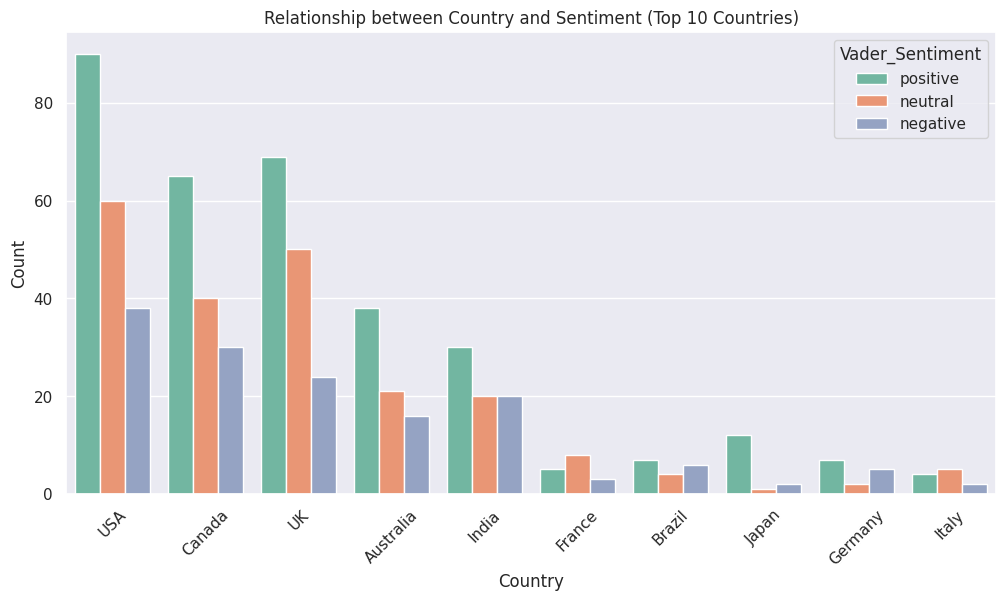

In [ ]:
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Vader_Sentiment', data=df_top_10_countries, palette='Set2')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

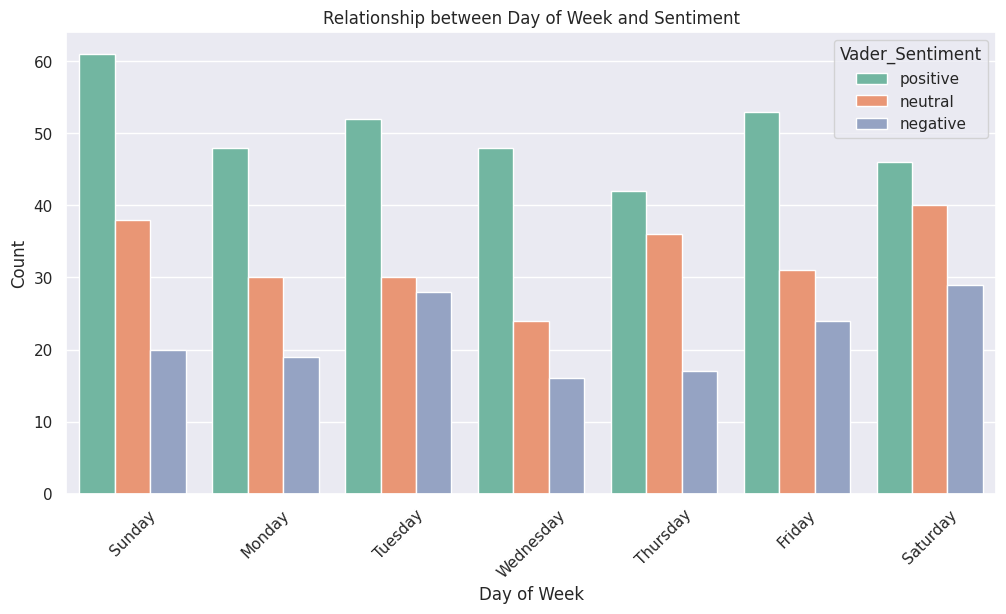

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Vader_Sentiment', data=df1, palette='Set2')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

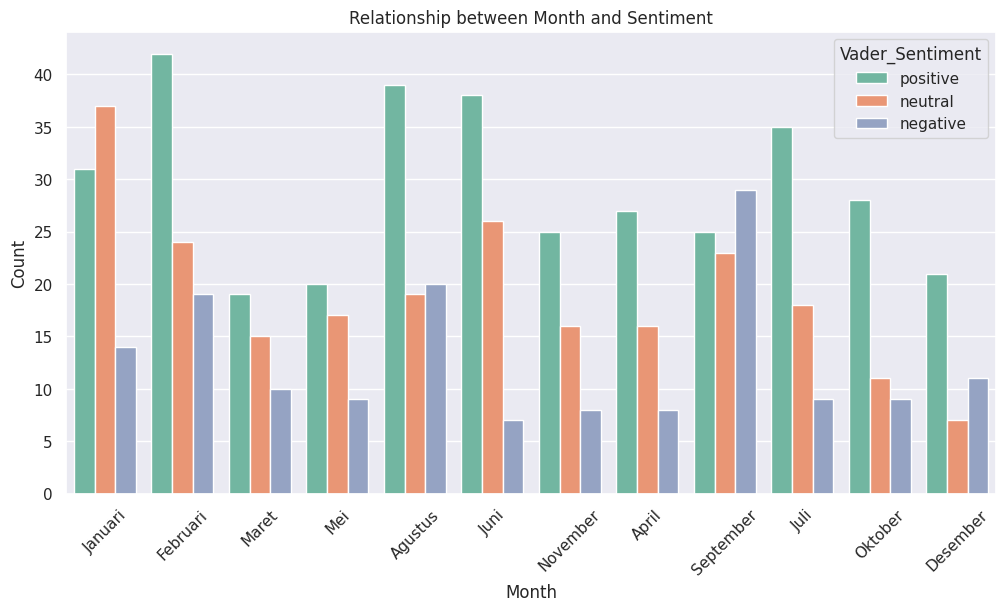

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Vader_Sentiment', data=df1, palette='Set2')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

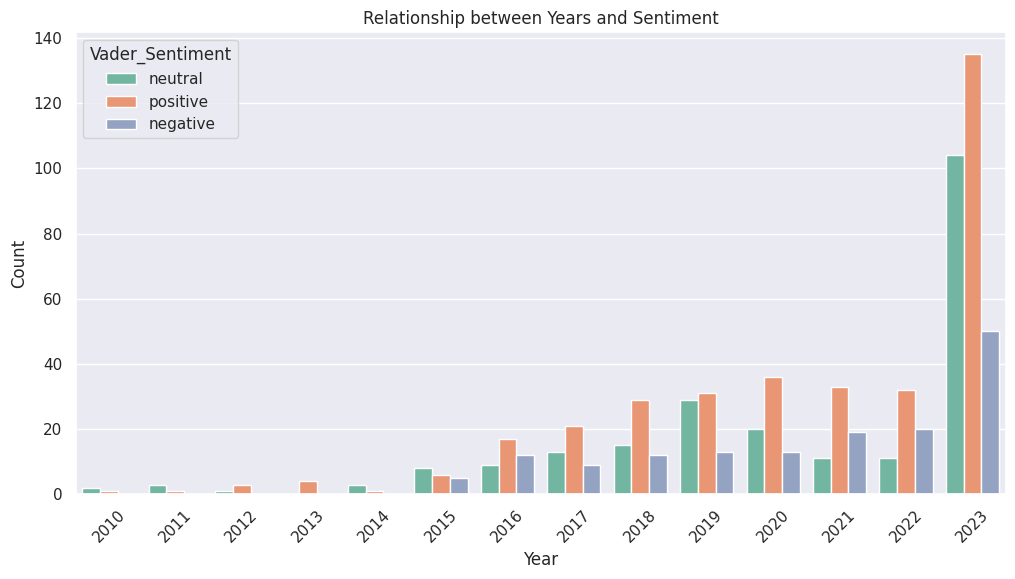

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Vader_Sentiment', data=df1, palette='Set2')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


In [ ]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [ ]:
top = Counter([item for sublist in df1[df1['Vader_Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,joy,30
1,friend,24
2,laughter,24
3,new,21
4,challeng,20
5,life,20
6,hope,20
7,dream,20
8,embrac,19
9,like,19


In [ ]:
top = Counter([item for sublist in df1[df1['Vader_Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,22
1,explor,13
2,excit,12
3,life,12
4,beauti,12
5,night,12
6,danc,12
7,attend,11
8,seren,11
9,feel,10


In [ ]:
top = Counter([item for sublist in df1[df1['Vader_Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,despair,14
1,lost,14
2,emot,13
3,feel,11
4,bitter,10
5,storm,10
6,day,9
7,like,9
8,grief,8
9,heart,8


In [ ]:
df2 = df1.copy()

In [ ]:
df2.head(2)

,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week,Clean_Text,Vader_Score,Vader_Sentiment,word_count,temp_list
0,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,Januari,Sunday,enjoy beauti day park,0.4939,positive,36,"[enjoy, beauti, day, park]"
1,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,Januari,Sunday,traffic terribl morn,0.0000,neutral,38,"[traffic, terribl, morn]"


**Importing necessary libraries and classifiers of lexicon and machine learning models**
---

In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 910.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=ec4af5fc6847de6fdc625a49ef6909c1b6181e9339e9006cc0a267f1ae06224e
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from afinn import Afinn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

**Splitting of data**
---

In [ ]:
X = df2['Clean_Text'].values
y = df2['Vader_Sentiment'].values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Lexicon Based**
---

**SentimentIntensityAnalyzer()**

In [ ]:
analyzer = SentimentIntensityAnalyzer()
predicted_train_labels = []
for text in X_train:
    sentiment_score = analyzer.polarity_scores(text)
    predicted_label = 'positive' if sentiment_score['compound'] >= 0 else 'negative'
    predicted_train_labels.append(predicted_label)
accuracy_train = accuracy_score(y_train, predicted_train_labels)
classification_rep_train = classification_report(y_train, predicted_train_labels)

In [ ]:
predicted_test_labels = []
for text in X_test:
    sentiment_score = analyzer.polarity_scores(text)
    predicted_label = 'positive' if sentiment_score['compound'] >= 0 else 'negative'
    predicted_test_labels.append(predicted_label)
accuracy_test = accuracy_score(y_test, predicted_test_labels)
classification_rep_test = classification_report(y_test, predicted_test_labels)

In [ ]:
print("\nTest Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)


Test Set Results:
Accuracy: 0.6258503401360545
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        32
     neutral       0.00      0.00      0.00        55
    positive       0.52      1.00      0.69        60

    accuracy                           0.63       147
   macro avg       0.51      0.67      0.56       147
weighted avg       0.43      0.63      0.50       147



**Afinn()**

In [ ]:
# Initialize the AFINN lexicon
afinn = Afinn()

# Predict sentiment labels for training data
predicted_train_labels = []
for text in X_train:
    sentiment_score = afinn.score(text)
    predicted_label = 'positive' if sentiment_score >= 0 else 'negative'
    predicted_train_labels.append(predicted_label)

# Evaluate accuracy and generate classification report for training data
accuracy_train = accuracy_score(y_train, predicted_train_labels)
classification_rep_train = classification_report(y_train, predicted_train_labels)

# Predict sentiment labels for testing data
predicted_test_labels = []
for text in X_test:
    sentiment_score = afinn.score(text)
    predicted_label = 'positive' if sentiment_score >= 0 else 'negative'
    predicted_test_labels.append(predicted_label)

In [ ]:
# Evaluate accuracy and generate classification report for testing data
accuracy_test = accuracy_score(y_test, predicted_test_labels)
classification_rep_test = classification_report(y_test, predicted_test_labels)

# Print accuracy and classification report for training data
print("Training Accuracy:", accuracy_train)
print("Classification Report for Training Data:")
print(classification_rep_train)

# Print accuracy and classification report for testing data
print("\nTesting Accuracy:", accuracy_test)
print("Classification Report for Testing Data:")
print(classification_rep_test)

Training Accuracy: 0.6564102564102564
Classification Report for Training Data:
              precision    recall  f1-score   support

    negative       0.87      0.86      0.87       121
     neutral       0.00      0.00      0.00       174
    positive       0.60      0.97      0.74       290

    accuracy                           0.66       585
   macro avg       0.49      0.61      0.54       585
weighted avg       0.48      0.66      0.55       585


Testing Accuracy: 0.5782312925170068
Classification Report for Testing Data:
              precision    recall  f1-score   support

    negative       0.87      0.84      0.86        32
     neutral       0.00      0.00      0.00        55
    positive       0.50      0.97      0.66        60

    accuracy                           0.58       147
   macro avg       0.46      0.60      0.51       147
weighted avg       0.39      0.58      0.46       147



**ML based**
---

**PassiveAggressiveClassifier()**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [ ]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [ ]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.81      0.80        32
     neutral       0.73      0.55      0.62        55
    positive       0.67      0.82      0.74        60

    accuracy                           0.71       147
   macro avg       0.73      0.72      0.72       147
weighted avg       0.72      0.71      0.71       147



**TextBlob()**

In [ ]:
def get_sentiment_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

predicted_train_labels_textblob = [get_sentiment_textblob(text) for text in X_train]
accuracy_train_textblob = accuracy_score(y_train, predicted_train_labels_textblob)
classification_rep_train_textblob = classification_report(y_train, predicted_train_labels_textblob)

predicted_test_labels_textblob = [get_sentiment_textblob(text) for text in X_test]
accuracy_test_textblob = accuracy_score(y_test, predicted_test_labels_textblob)
classification_rep_test_textblob = classification_report(y_test, predicted_test_labels_textblob)

In [ ]:
print("\nTextBlob - Test Set Results:")
print(f"Accuracy: {accuracy_test_textblob}")
print("Classification Report:\n", classification_rep_test_textblob)



TextBlob - Test Set Results:
Accuracy: 0.6258503401360545
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.47      0.52        32
     neutral       0.56      0.75      0.64        55
    positive       0.75      0.60      0.67        60

    accuracy                           0.63       147
   macro avg       0.63      0.60      0.61       147
weighted avg       0.64      0.63      0.62       147



**Out of PassiveAggressiveClassifier and TextBlob, PassiveAggressiveClassifier is the best ml model with the accuracy of 71%**

In [ ]:
param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1],
}

In [ ]:
pac_classifier = PassiveAggressiveClassifier(random_state=42)

randomized_search = RandomizedSearchCV(pac_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

Streaming output truncated to the last 5000 lines.
Total training time: 0.01 seconds.
-- Epoch 12
Norm: 21.84, NNZs: 1525, Bias: -0.095187, T: 5616, Avg. loss: 0.000240
Total training time: 0.01 seconds.
-- Epoch 13
Norm: 21.84, NNZs: 1525, Bias: -0.095215, T: 6084, Avg. loss: 0.000143
Total training time: 0.01 seconds.
-- Epoch 14
Norm: 21.85, NNZs: 1525, Bias: -0.095232, T: 6552, Avg. loss: 0.000088
Total training time: 0.01 seconds.
Convergence after 14 epochs took 0.01 seconds
-- Epoch 1
Norm: 10.02, NNZs: 1513, Bias: -0.498305, T: 468, Avg. loss: 0.535096
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 13.67, NNZs: 1546, Bias: -0.394123, T: 936, Avg. loss: 0.192102
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 15.42, NNZs: 1553, Bias: -0.350227, T: 1404, Avg. loss: 0.076113
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 16.16, NNZs: 1555, Bias: -0.349087, T: 1872, Avg. loss: 0.030234
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 16.47, NNZs: 1556, Bias: -0.358

RandomizedSearchCV(cv=5, estimator=PassiveAggressiveClassifier(random_state=42),
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'fit_intercept': [True, False],
                                        'shuffle': [True, False],
                                        'verbose': [0, 1]},
                   random_state=42, scoring='accuracy')

In [ ]:
best_params_randomized = randomized_search.best_params_

In [ ]:
best_pac_classifier_randomized = PassiveAggressiveClassifier(random_state=42, **best_params_randomized)
best_pac_classifier_randomized.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42, shuffle=False)

In [ ]:
y_pred_best_pac_randomized = best_pac_classifier_randomized.predict(X_test_tfidf)

In [ ]:
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [ ]:
print("Best PassiveAggressiveClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_pac_randomized}")
print("Classification Report:\n", classification_rep_best_pac_randomized)

Best PassiveAggressiveClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}
Accuracy: 0.7278911564625851
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.81      0.83        32
     neutral       0.74      0.56      0.64        55
    positive       0.68      0.83      0.75        60

    accuracy                           0.73       147
   macro avg       0.75      0.74      0.74       147
weighted avg       0.73      0.73      0.72       147



**Confusion Matrix**
---

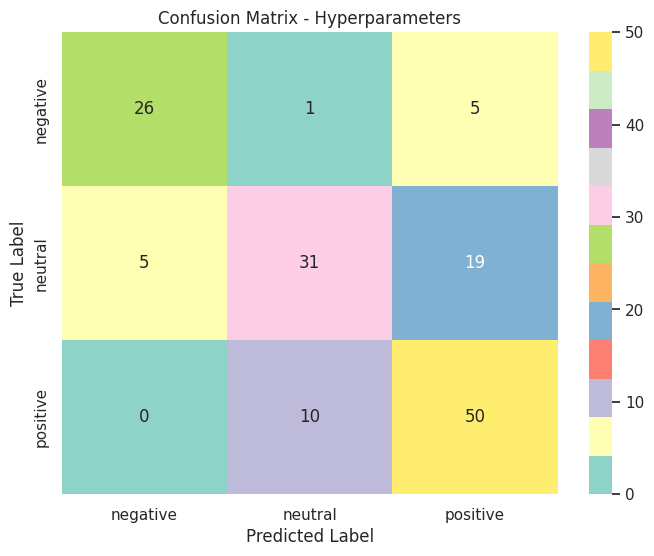

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Set3', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Adding all different sentiments in only three sentiments ,i.e, in positive, negative and neutral.**

Text                   object
Sentiment              object
Timestamp      datetime64[ns]
User                   object
Platform               object
Retweets              float64
Likes                 float64
Country                object
Year                    int64
Month                  object
Day_of_Week            object
dtype: object
         Retweets       Likes         Year
count  732.000000  732.000000   732.000000
mean    21.508197   42.901639  2020.471311
std      7.061286   14.089848     2.802285
min      5.000000   10.000000  2010.000000
25%     17.750000   34.750000  2019.000000
50%     22.000000   43.000000  2021.000000
75%     25.000000   50.000000  2023.000000
max     40.000000   80.000000  2023.000000
[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 '

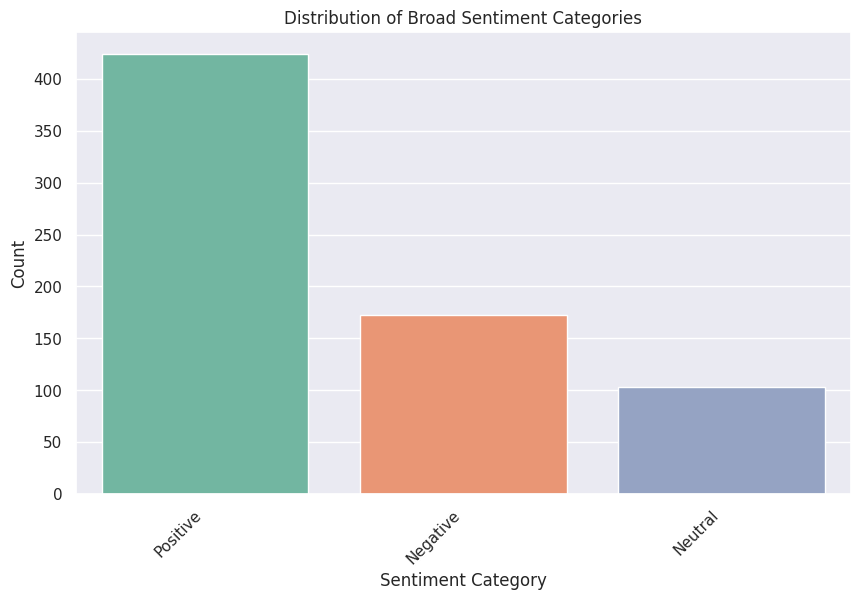

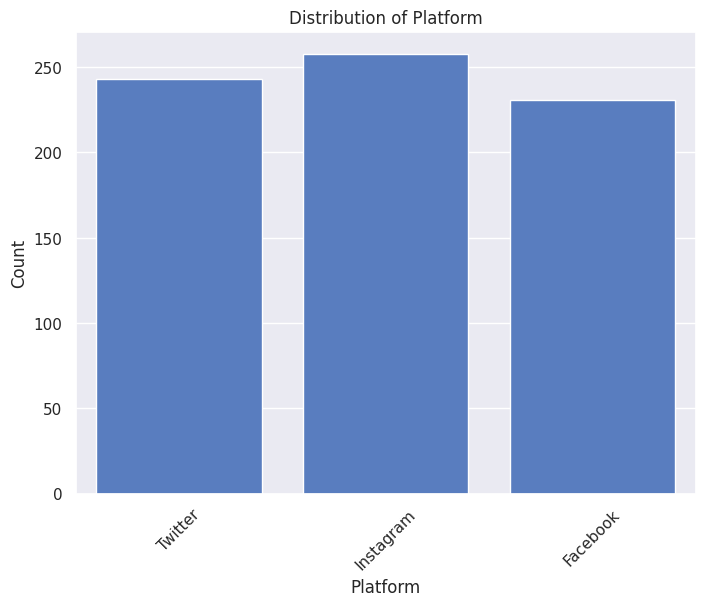

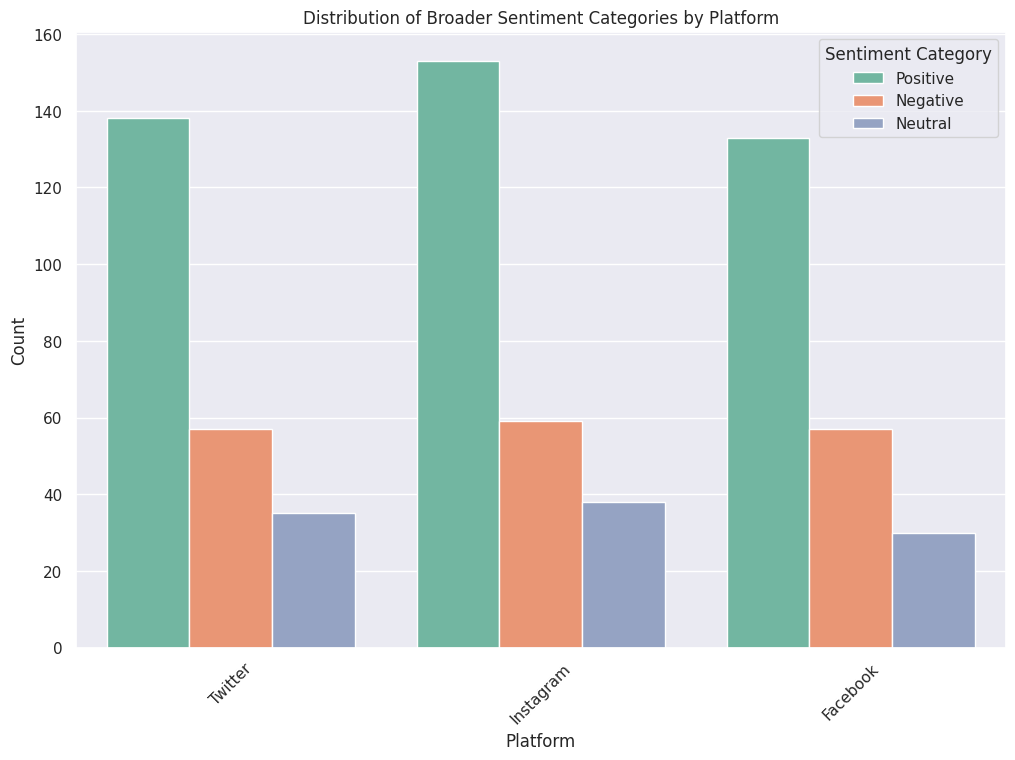

In [ ]:
# Check data types
print(df.dtypes)

# Summary statistics
print(df.describe())

# Check unique values in the 'Sentiment' column
print(df['Sentiment'].unique())

# Map sentiments to categories
df['Sentiment_Category'] = df['Sentiment'].map({'Positive': 'Positive', 'Negative': 'Negative', 'Neutral': 'Neutral'})

# Check unique values in the 'Sentiment_Category' column after mapping
print(df['Sentiment_Category'].unique())

# Define broader sentiment categories
broad_sentiment_mapping = {
    'Positive': ['Positive', 'Happiness', 'Joy', 'Love', 'Enjoyment', 'Admiration', 'Affection', 'Awe', 'Acceptance', 'Adoration', 'Anticipation', 'Kind', 'Pride', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited', 'Inspired', 'Confident', 'Ambivalence', 'Bittersweet', 'Curiosity', 'Inspiration', 'Motivation', 'Contemplation', 'JoyfulReunion', 'Satisfaction', 'Blessed', 'Reflection', 'Appreciation', 'Confidence', 'Accomplishment', 'Wonderment', 'Optimism', 'Enchantment', 'Intrigue', 'PlayfulJoy', 'Mindfulness', 'DreamChaser', 'Elegance', 'Whimsy', 'Pensive', 'Harmony', 'Creativity', 'Radiance', 'Wonder', 'Rejuvenation', 'Coziness', 'Adventure', 'Melodic', 'FestiveJoy', 'InnerJourney', 'Freedom', 'Dazzle', 'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 'Immersion', 'Spark', 'Marvel', 'Heartbreak', 'Loss', 'Heartache', 'Solitude', 'Positivity', 'Kindness', 'Friendship', 'Surprise', 'Success', 'Reflection', 'Exploration', 'Awe', 'Amazement', 'Romance', 'Captivation', 'Wonder', 'Tranquility', 'Grandeur', 'Emotion', 'Energy', 'Celebration', 'Charm', 'Ecstasy', 'Hope', 'Creativity', 'Colorful', 'Pride', 'Hypnotic', 'Connection', 'Iconic', 'Euphoria', 'Journey', 'Engagement', 'Touched', 'Satisfaction', 'Admiration', 'Triumph', 'Heartwarming', 'Harmony', 'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic', 'Thrilling Journey', "Nature's Beauty", 'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Whispers of the Past'],
    'Negative': ['Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Confusion', 'Shame', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Despair', 'Loneliness', 'Frustration', 'Anxiety', 'Intimidation', 'Helplessness', 'Jealousy', 'Indifference', 'Numbness', 'Melancholy', 'Nostalgia', 'Ambivalence', 'Despair', 'Bitterness', 'Yearning', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious', 'Dismissive', 'Desperation', 'Sorrow', 'Darkness', 'Desolation', 'Heartbreak', 'Betrayal', 'Suffering', 'EmotionalStorm', 'Regret', 'Isolation', 'Disappointment', 'LostLove', 'Melancholy', 'Exhaustion'],
    'Neutral': ['Neutral', 'Confusion', 'Excitement', 'Shame', 'Numbness', 'Curiosity', 'Despair', 'Melancholy', 'Serene', 'Numbness', 'Zest', 'Contentment', 'Boredom', 'Indifference', 'Disgust', 'Relief', 'Embarrassed', 'Mischievous', 'Sad', 'Hate', 'Bad', 'Neutral', 'Happy']
}

# Map sentiments to broader categories
df['Broad_Sentiment'] = df['Sentiment'].apply(lambda x: next((k for k, v in broad_sentiment_mapping.items() if x.strip() in v), None))

# Plot the distribution of broader sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Broad_Sentiment', data=df, palette="Set2")
plt.title('Distribution of Broad Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Distribution of platform
plt.figure(figsize=(8, 6))
sns.countplot(x='Platform', data=df)
plt.title('Distribution of Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of broader sentiment categories by platform
plt.figure(figsize=(12, 8))
sns.countplot(x='Platform', hue='Broad_Sentiment', data=df, palette='Set2')
plt.title('Distribution of Broader Sentiment Categories by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category')
plt.show()

